# 🧠 Project Overview
This project aims to solve a **classification problem** using a student performance dataset. The goal is to help school administrators identify students at risk of failing, allowing for early intervention.

### 📌 Business Problem
School administrators want to identify students likely to fail the final grade (G3 < 10), so they can implement targeted support.

### 🧑 Stakeholder
School management and academic support teams who need early alerts for students needing academic intervention.

In [1]:
# 📘 Step 1: Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score


In [ ]:
# 📊 Business and Data Understanding
The dataset contains features such as study time, failures, absences, and grades (G1, G2, G3). The target variable is whether a student **passes** or **fails**, based on their final grade.
- **G3 < 10 → Fail (0)**
- **G3 >= 10 → Pass (1)**

We will build classification models to predict this target.

In [2]:
# 📊 Step 2: Load the dataset
df = pd.read_csv(r"C:\Users\user\Downloads\student-mat.csv")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# 🔍 Check for missing values and dataset structure
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# 📊 Business and Data Understanding
The dataset contains features such as study time, failures, absences, and grades (G1, G2, G3). The target variable is whether a student **passes** or **fails**, based on their final grade.
- **G3 < 10 → Fail (0)**
- **G3 >= 10 → Pass (1)**

We will build classification models to predict this target.

In [ ]:
## 🧼 Step 3: Data Preprocessing

We'll:
- Encode categorical features
- Create a target variable: pass (1) or fail (0), where G3 < 10 → fail
- Split the dataset into training and test sets


In [4]:
# 🎯 Create binary target variable: pass/fail
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Drop the original G3 grade as it leaks information
df.drop(['G3'], axis=1, inplace=True)

# 🔁 Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 🔍 Features and target
X = df_encoded.drop('pass', axis=1)
y = df_encoded['pass']


In [5]:
# 🧪 Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔄 Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
## 🤖 Step 4: Train Random Forest Classifier


In [6]:
# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict
y_pred = clf.predict(X_test_scaled)



## ✅ Step 5: Evaluate Model
We evaluate using:
- Accuracy
- Precision
- Recall
- Confusion Matrix


In [7]:
# 📈 Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("📊 Accuracy:", round(accuracy, 3))
print("🎯 Precision:", round(precision, 3))
print("🔁 Recall:", round(recall, 3))


📊 Accuracy: 0.911
🎯 Precision: 0.959
🔁 Recall: 0.904


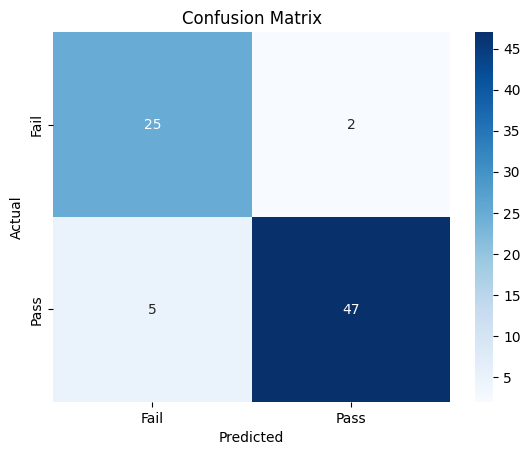


📋 Classification Report:

              precision    recall  f1-score   support

        Fail       0.83      0.93      0.88        27
        Pass       0.96      0.90      0.93        52

    accuracy                           0.91        79
   macro avg       0.90      0.91      0.90        79
weighted avg       0.92      0.91      0.91        79



In [8]:
# 🧩 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Detailed report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Fail", "Pass"]))
